In [153]:
import pandas as pd
user_purchases = pd.read_csv('user_purchases_chapter_two_exercise_one.csv')
user_purchases.head()

Unnamed: 0        date         uid            sku  price    reg_date  \
0           0  2018-03-14  84715271.0    sku_two_299    299  2018-03-09   
1           1  2018-03-16  84715271.0    sku_two_299    299  2018-03-09   
2           7  2018-01-14  47315877.0  sku_three_499    499  2018-01-07   
3           8  2018-01-15  47315877.0    sku_one_199    199  2018-01-07   
4           9  2018-01-16  47315877.0    sku_two_299    299  2018-01-07   

  device gender country  age  first_week_purchases  
0    and      M     USA   34                     1  
1    and      M     USA   34                     1  
2    iOS      F     BRA   15                     1  
3    iOS      F     BRA   15                     0  
4    iOS      F     BRA   15                     0

In [154]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})
user_purchases.head()
# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

In [155]:
# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)
user_purchases.head()

reg_date  first_week_purchases
0  2017-06-01              0.846154
1  2017-06-02              1.333333
2  2017-06-03              1.352941
3  2017-06-04              1.727273
4  2017-06-05              1.666667

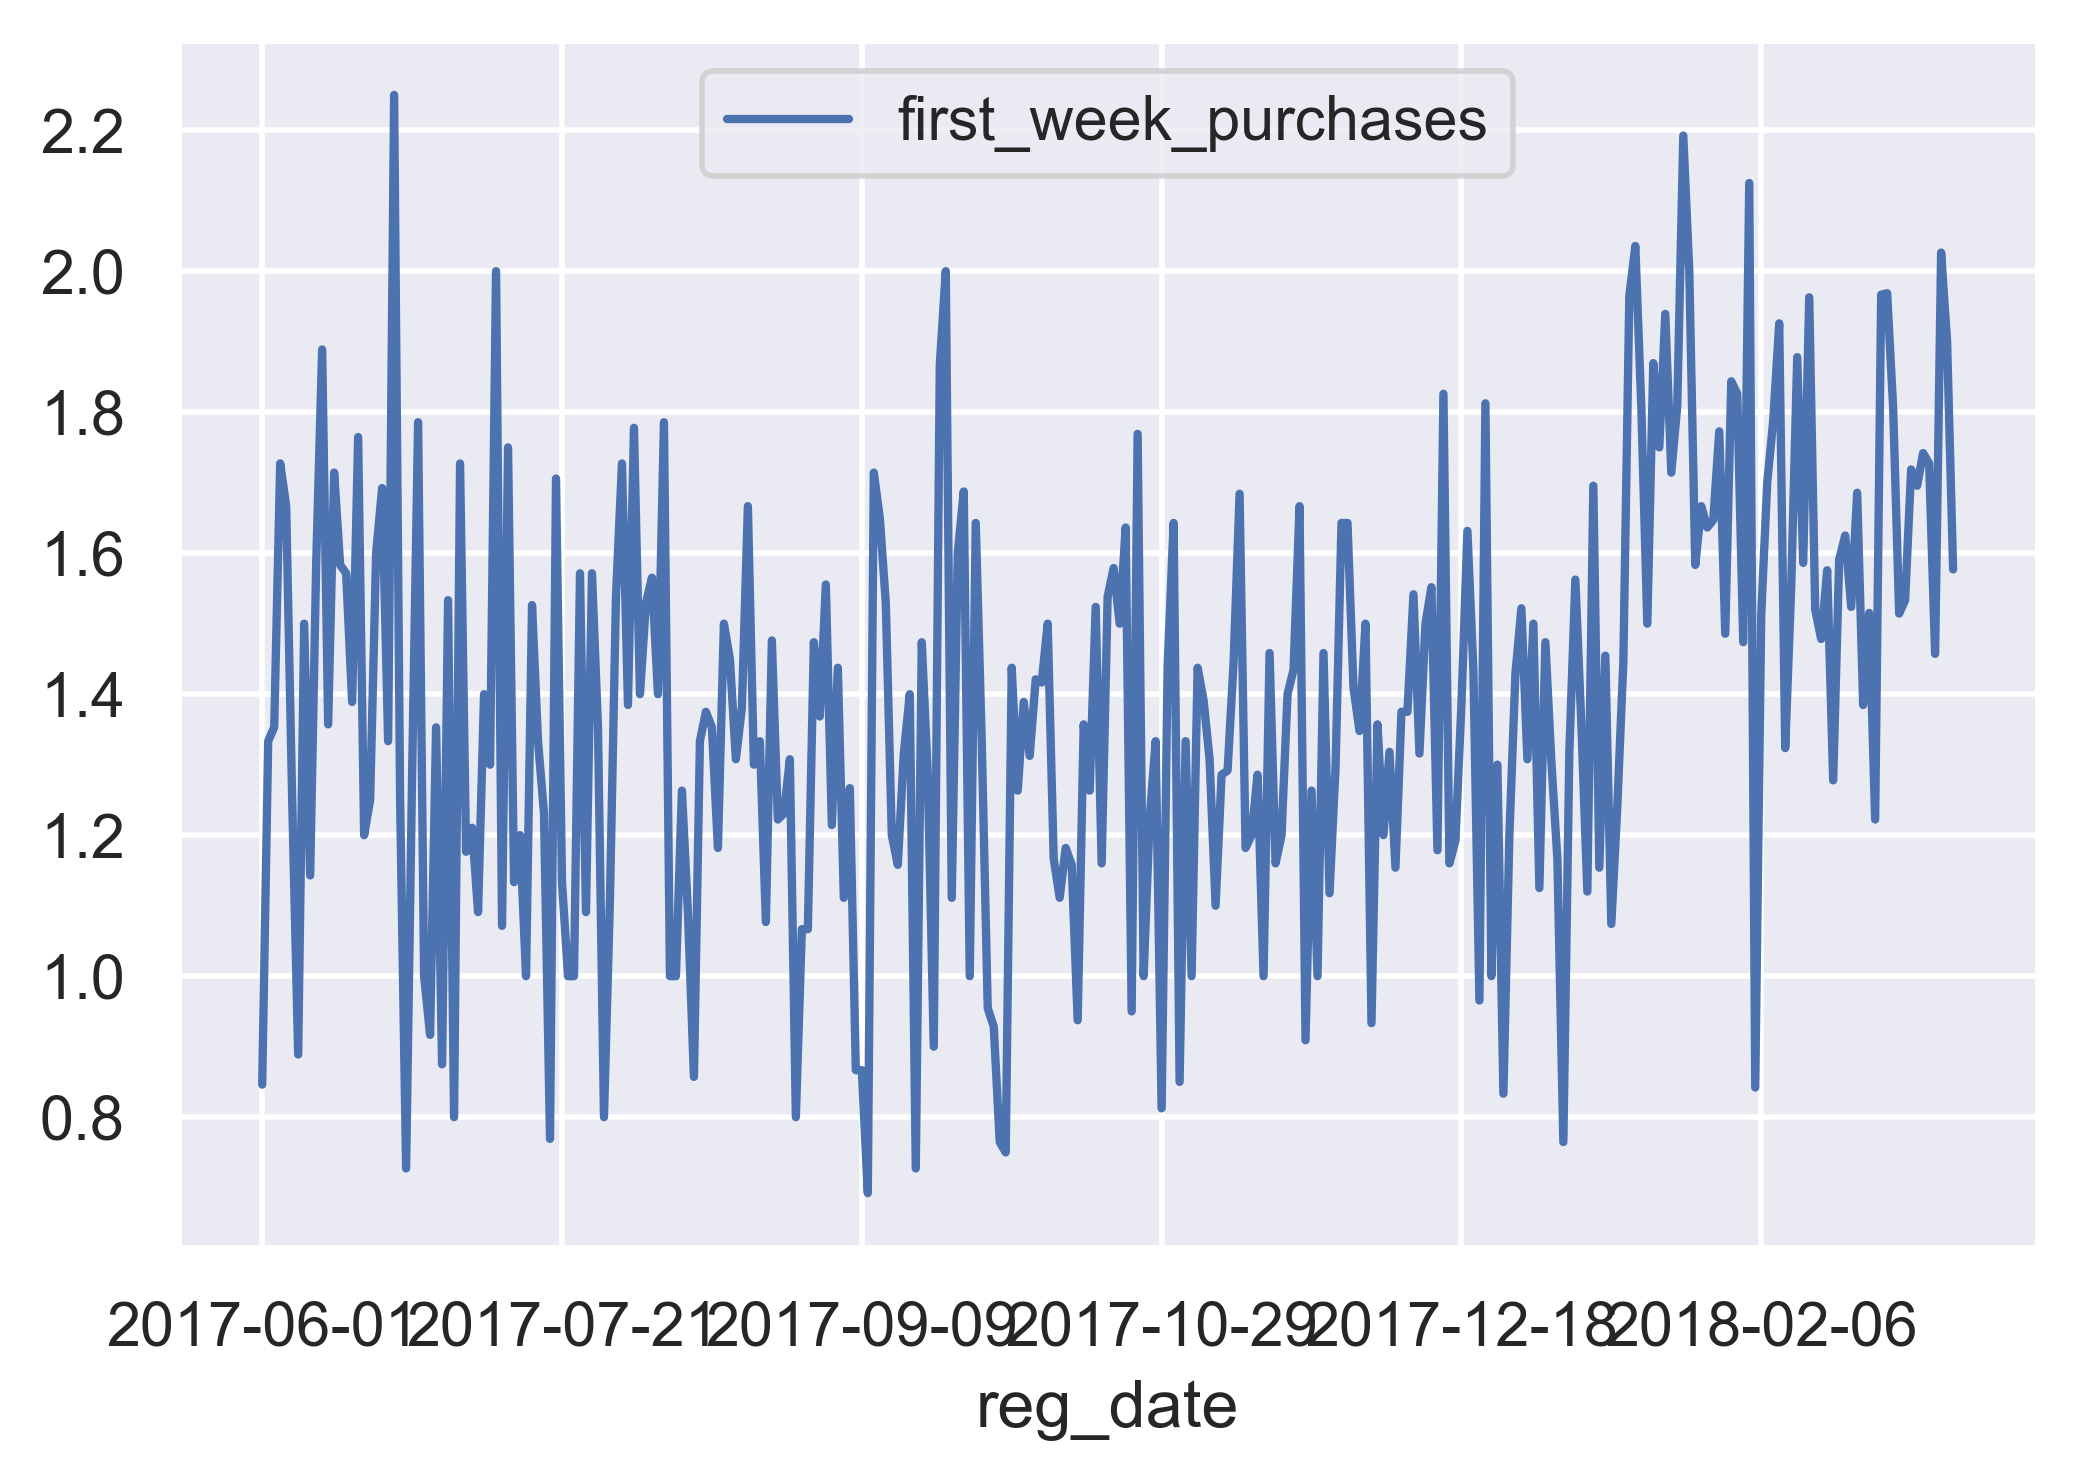

In [156]:
import matplotlib.pyplot as plt
# Plot the results
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

In [158]:
user_purchases = pd.read_csv('user_purchases_chapter_two_exercise_one.csv')
user_purchases_country = user_purchases.groupby(by=['reg_date', 'uid', 'country']).agg({'first_week_purchases': ['sum']})
user_purchases_country.head()
# Reset the indexes
user_purchases_country.columns = user_purchases_country.columns.droplevel(level=1)
user_purchases_country.reset_index(inplace=True)
user_purchases_country.head()

reg_date         uid country  first_week_purchases
0  2017-06-01  14425628.0     TUR                     1
1  2017-06-01  33027560.0     TUR                     0
2  2017-06-01  39880095.0     BRA                     2
3  2017-06-01  46080210.0     USA                     1
4  2017-06-01  48166079.0     TUR                     0

In [159]:
# Find the average number of purchases per day by first-week users
user_purchases_country = user_purchases.groupby(by=['reg_date', 'country']).agg({'first_week_purchases': ['mean']})
user_purchases_country.columns = user_purchases_country.columns.droplevel(level=1)
user_purchases_country.reset_index(inplace=True)
user_purchases_country.head()

reg_date country  first_week_purchases
0  2017-06-01     BRA              0.044118
1  2017-06-01     DEU              0.029412
2  2017-06-01     FRA              0.000000
3  2017-06-01     TUR              0.008772
4  2017-06-01     USA              0.034483

In [160]:
user_purchases_device = user_purchases.groupby(by=['reg_date', 'uid', 'device']).agg({'first_week_purchases': ['sum']})
user_purchases_device.head()
# Reset the indexes
user_purchases_device.columns = user_purchases_device.columns.droplevel(level=1)
user_purchases_device.reset_index(inplace=True)
user_purchases_device.head()

reg_date         uid device  first_week_purchases
0  2017-06-01  14425628.0    and                     1
1  2017-06-01  33027560.0    and                     0
2  2017-06-01  39880095.0    iOS                     2
3  2017-06-01  46080210.0    and                     1
4  2017-06-01  48166079.0    iOS                     0

In [161]:
# Find the average number of purchases per day by first-week users
user_purchases_device = user_purchases.groupby(by=['reg_date', 'device']).agg({'first_week_purchases': ['mean']})
user_purchases_device.columns = user_purchases_device.columns.droplevel(level=1)
user_purchases_device.reset_index(inplace=True)
user_purchases_device.head()

reg_date device  first_week_purchases
0  2017-06-01    and              0.025126
1  2017-06-01    iOS              0.022305
2  2017-06-02    and              0.043750
3  2017-06-02    iOS              0.032028
4  2017-06-03    and              0.057432

In [162]:
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

           first_week_purchases                                          \
country                     BRA       CAN       DEU       FRA       TUR   
reg_date                                                                  
2017-06-01             0.044118       NaN  0.029412  0.000000  0.008772   
2017-06-02             0.046512       NaN  0.014085       NaN  0.019231   
2017-06-03             0.032258  0.066667  0.037037  0.038835  0.096774   
2017-06-04             0.075472       NaN  0.037037  0.075472       NaN   
2017-06-05             0.054945       NaN       NaN       NaN  0.047059   

                      
country          USA  
reg_date              
2017-06-01  0.034483  
2017-06-02  0.043103  
2017-06-03  0.040268  
2017-06-04  0.037634  
2017-06-05  0.031250  


In [163]:
country_pivot.index

Index(['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
       '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-10',
       ...
       '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04', '2018-03-05',
       '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10'],
      dtype='object', name='reg_date', length=283)

In [164]:
device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
print(device_pivot.head())

           first_week_purchases          
device                      and       iOS
reg_date                                 
2017-06-01             0.025126  0.022305
2017-06-02             0.043750  0.032028
2017-06-03             0.057432  0.023715
2017-06-04             0.043716  0.050691
2017-06-05             0.042345  0.111111


In [165]:
country_pivot.reset_index(inplace=True)
country_pivot = country_pivot.rename(columns = {'index':'reg_date'})

In [166]:
country_pivot.head()

reg_date first_week_purchases                                \
country                              BRA       CAN       DEU       FRA   
0        2017-06-01             0.044118       NaN  0.029412  0.000000   
1        2017-06-02             0.046512       NaN  0.014085       NaN   
2        2017-06-03             0.032258  0.066667  0.037037  0.038835   
3        2017-06-04             0.075472       NaN  0.037037  0.075472   
4        2017-06-05             0.054945       NaN       NaN       NaN   

                             
country       TUR       USA  
0        0.008772  0.034483  
1        0.019231  0.043103  
2        0.096774  0.040268  
3             NaN  0.037634  
4        0.047059  0.031250

In [167]:
country_pivot.columns = ['reg_date', 'BRA', 'CAN', 'DEU', 'FRA', 'TUR', 'USA']

In [168]:
%matplotlib inline
plt.rcParams['figure.dpi']=400

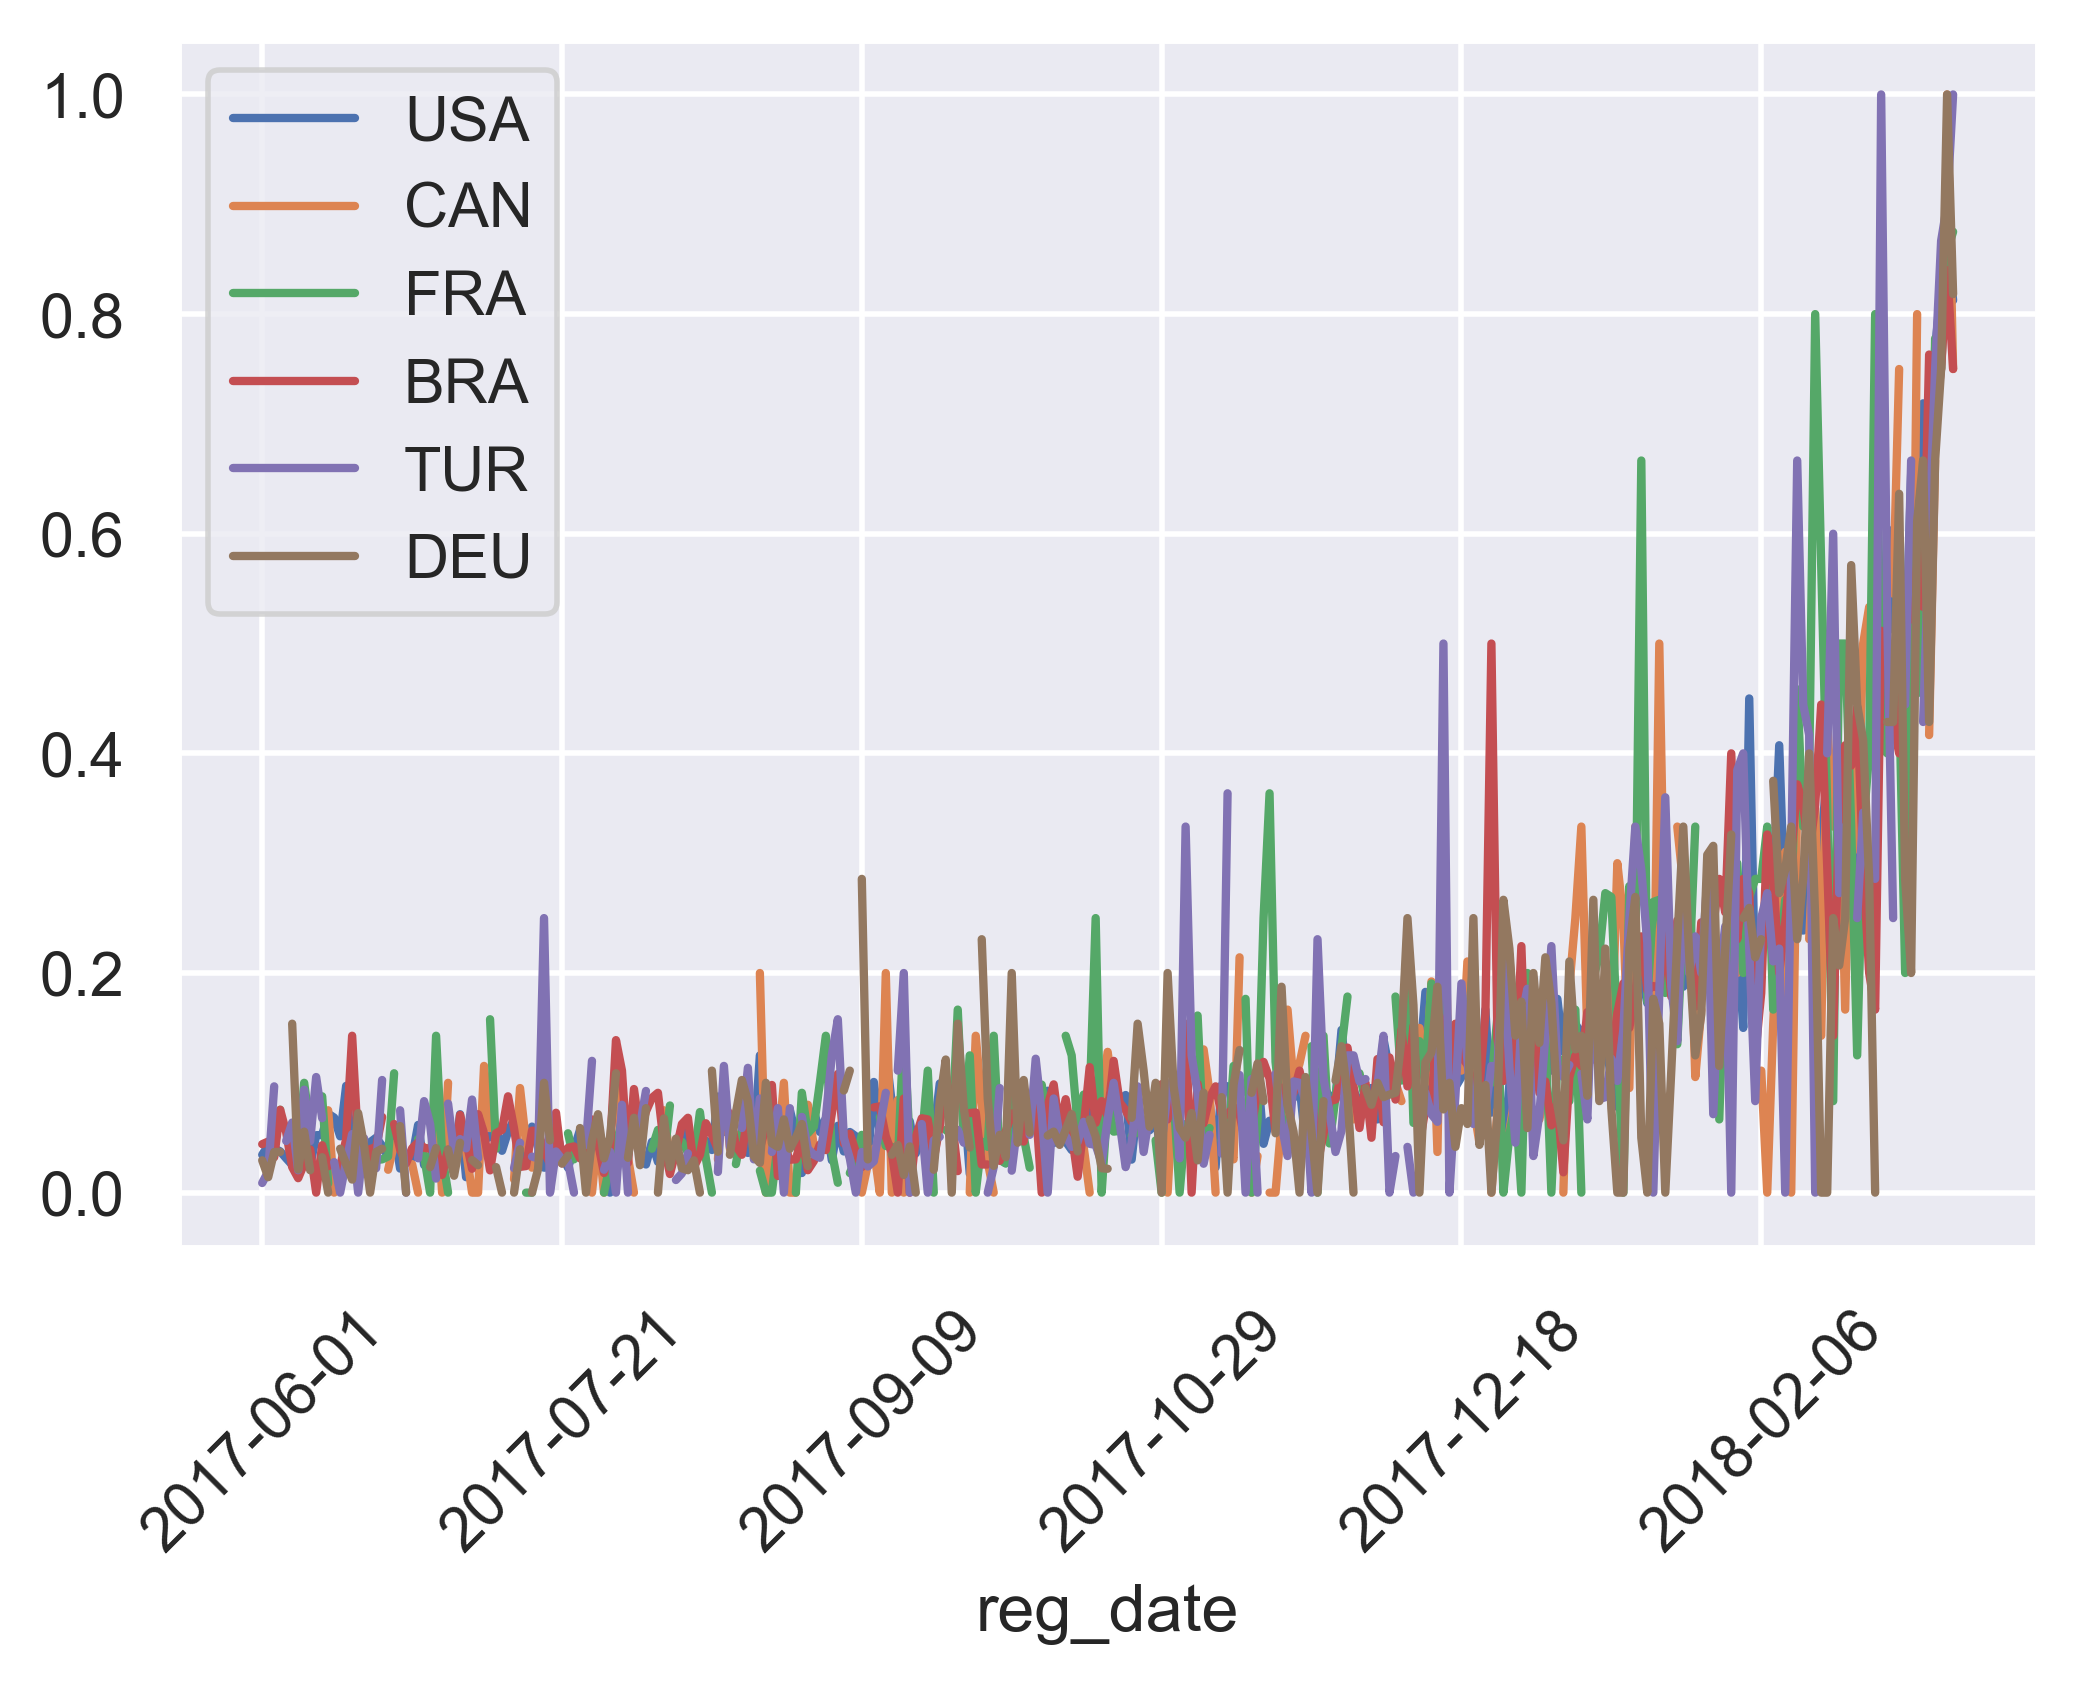

In [169]:
country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR','DEU'])
plt.xticks(rotation=45)
plt.show()

In [170]:
import pandas as pd
daily_revenue = pd.read_csv('daily_revenue.csv')
daily_revenue.head()

index gender device   revenue                  date country
0      1   male    ios  186557.0  2013-09-20T00:00:00Z     USA
1      2   male    ios  177217.0  2013-09-21T00:00:00Z     USA
2      3   male    ios  177197.0  2013-09-22T00:00:00Z     USA
3      4   male    ios  157193.0  2013-09-23T00:00:00Z     USA
4      5   male    ios  165592.0  2013-09-24T00:00:00Z     USA

In [171]:
# Group the data and aggregate first_week_purchases
daily_rev = daily_revenue.groupby(by=['date']).agg({'revenue': ['sum']})
daily_rev.head()
# Reset the indexes
daily_rev.columns = daily_rev.columns.droplevel(level=1)
daily_rev.reset_index(inplace=True)

In [172]:
daily_rev.head()

date    revenue
0  2013-09-20T00:00:00Z  1040405.0
1  2013-09-21T00:00:00Z   998827.0
2  2013-09-22T00:00:00Z   950908.0
3  2013-09-23T00:00:00Z   890947.0
4  2013-09-24T00:00:00Z   942562.0

In [173]:
# Compute 7_day_rev
daily_rev['7_day_rev'] = daily_rev.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_rev['28_day_rev'] = daily_rev.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_rev['365_day_rev'] = daily_rev.revenue.rolling(window=365,center=False).mean()
    


In [174]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

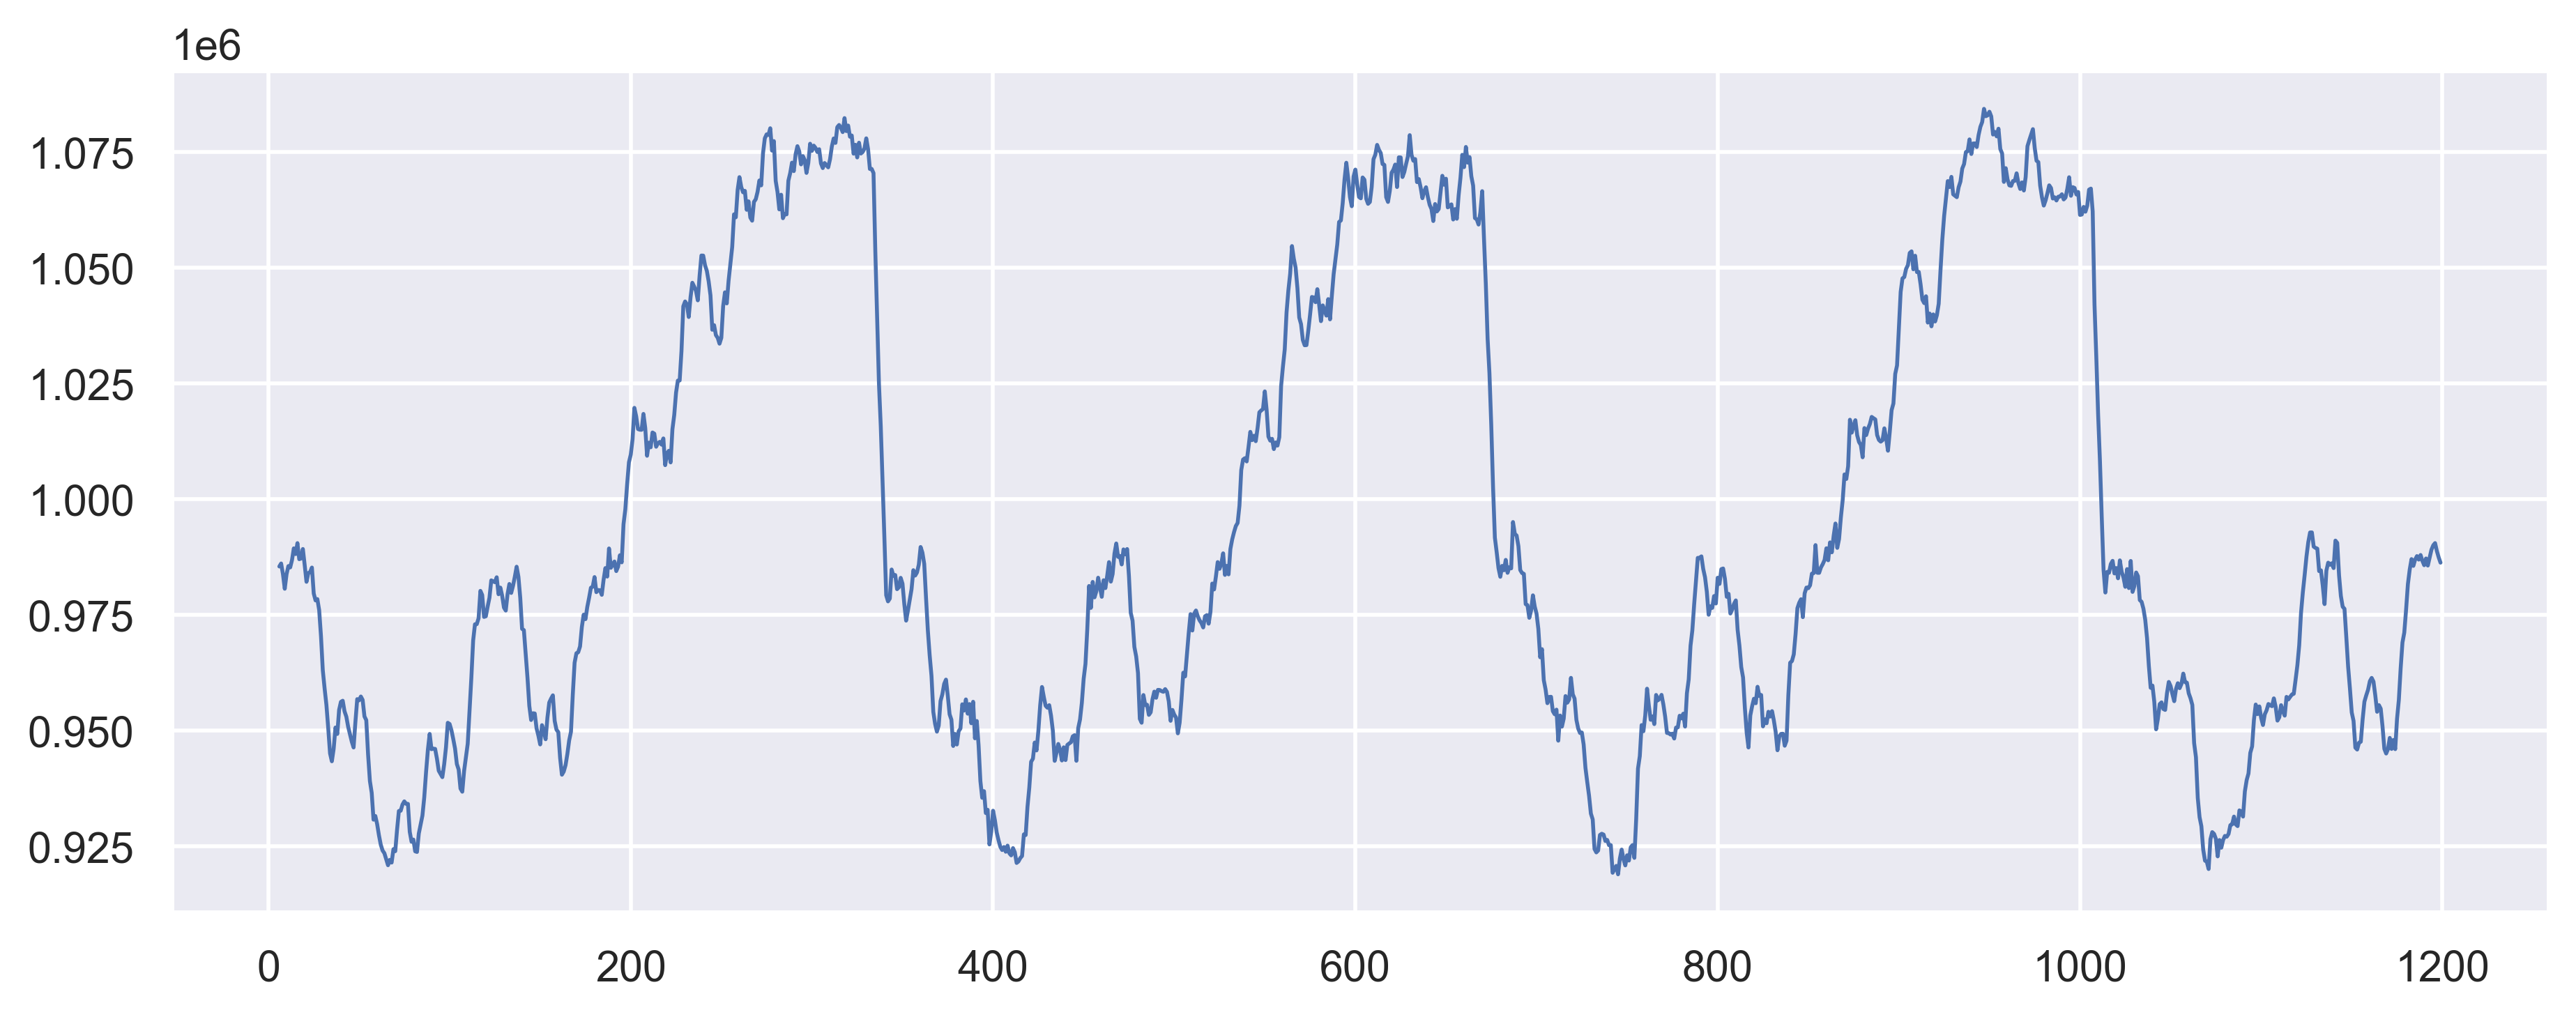

In [175]:
daily_rev['7_day_rev'].plot(linewidth=1);

C:\Users\psahai\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\psahai\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\psahai\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\psahai\Anaconda3\lib\site-packages\pandas\plot

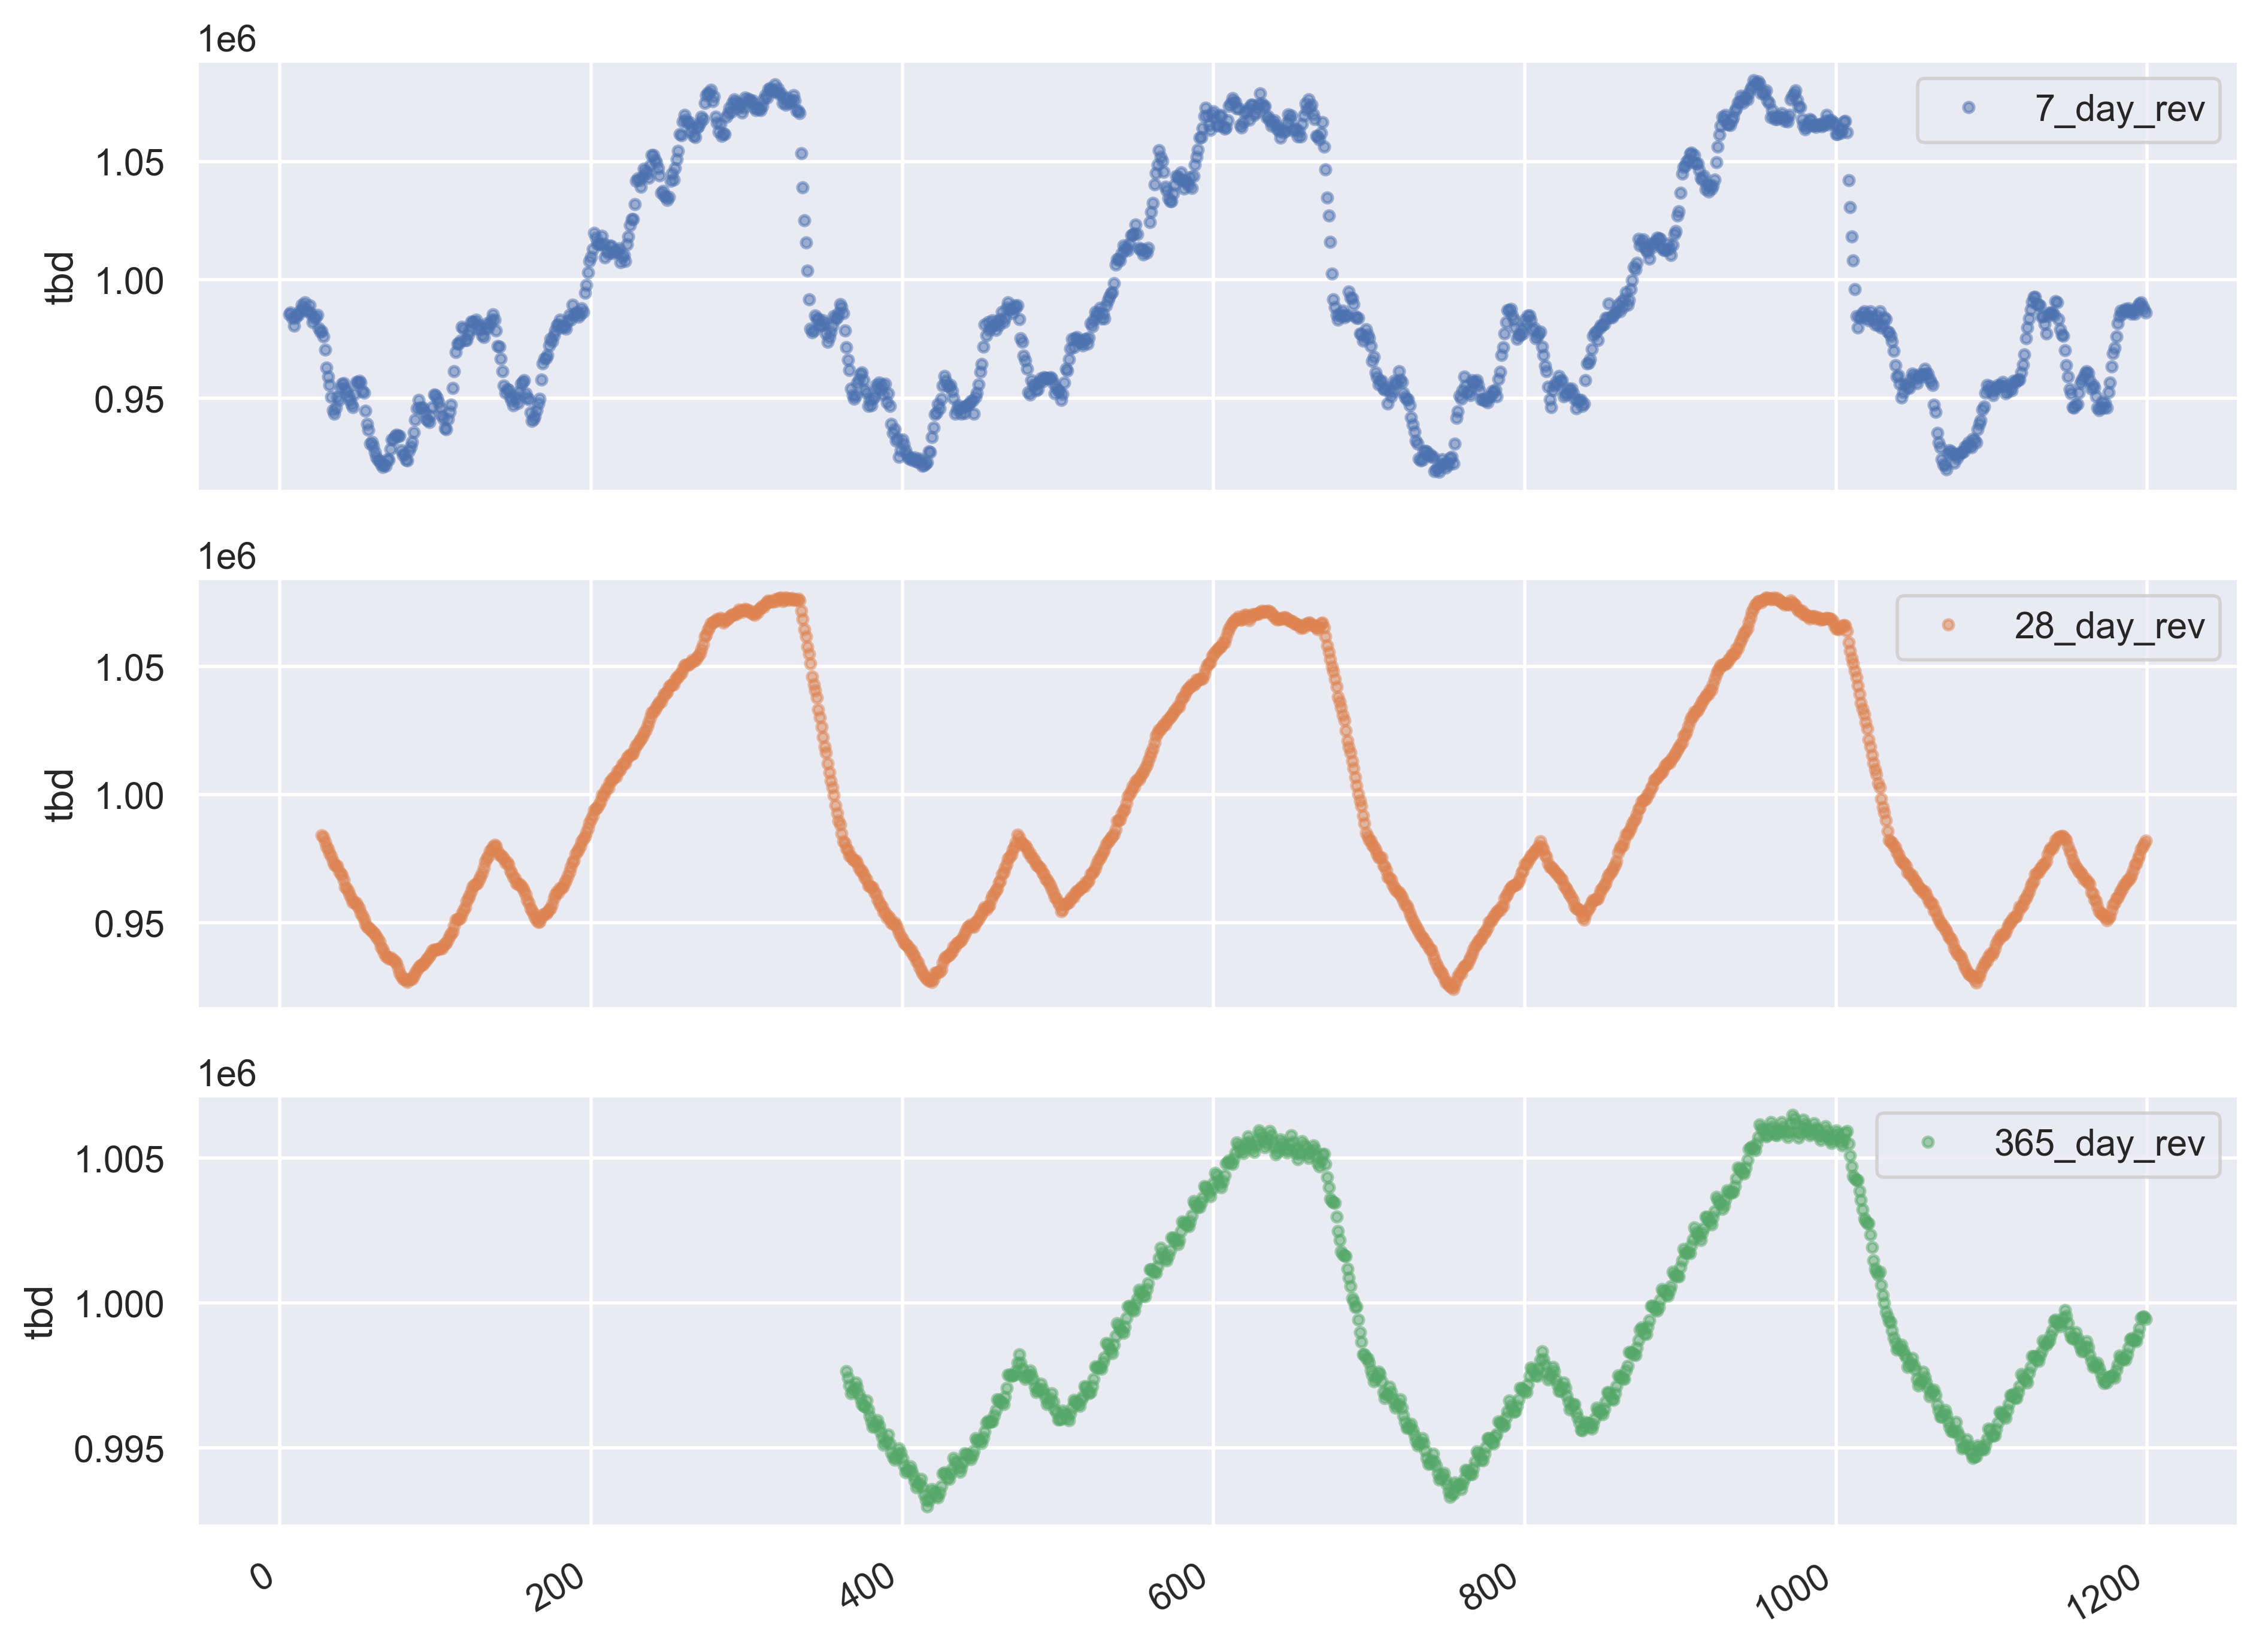

In [176]:
cols_plot = ['7_day_rev', '28_day_rev', '365_day_rev']
axes = daily_rev[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('tbd')

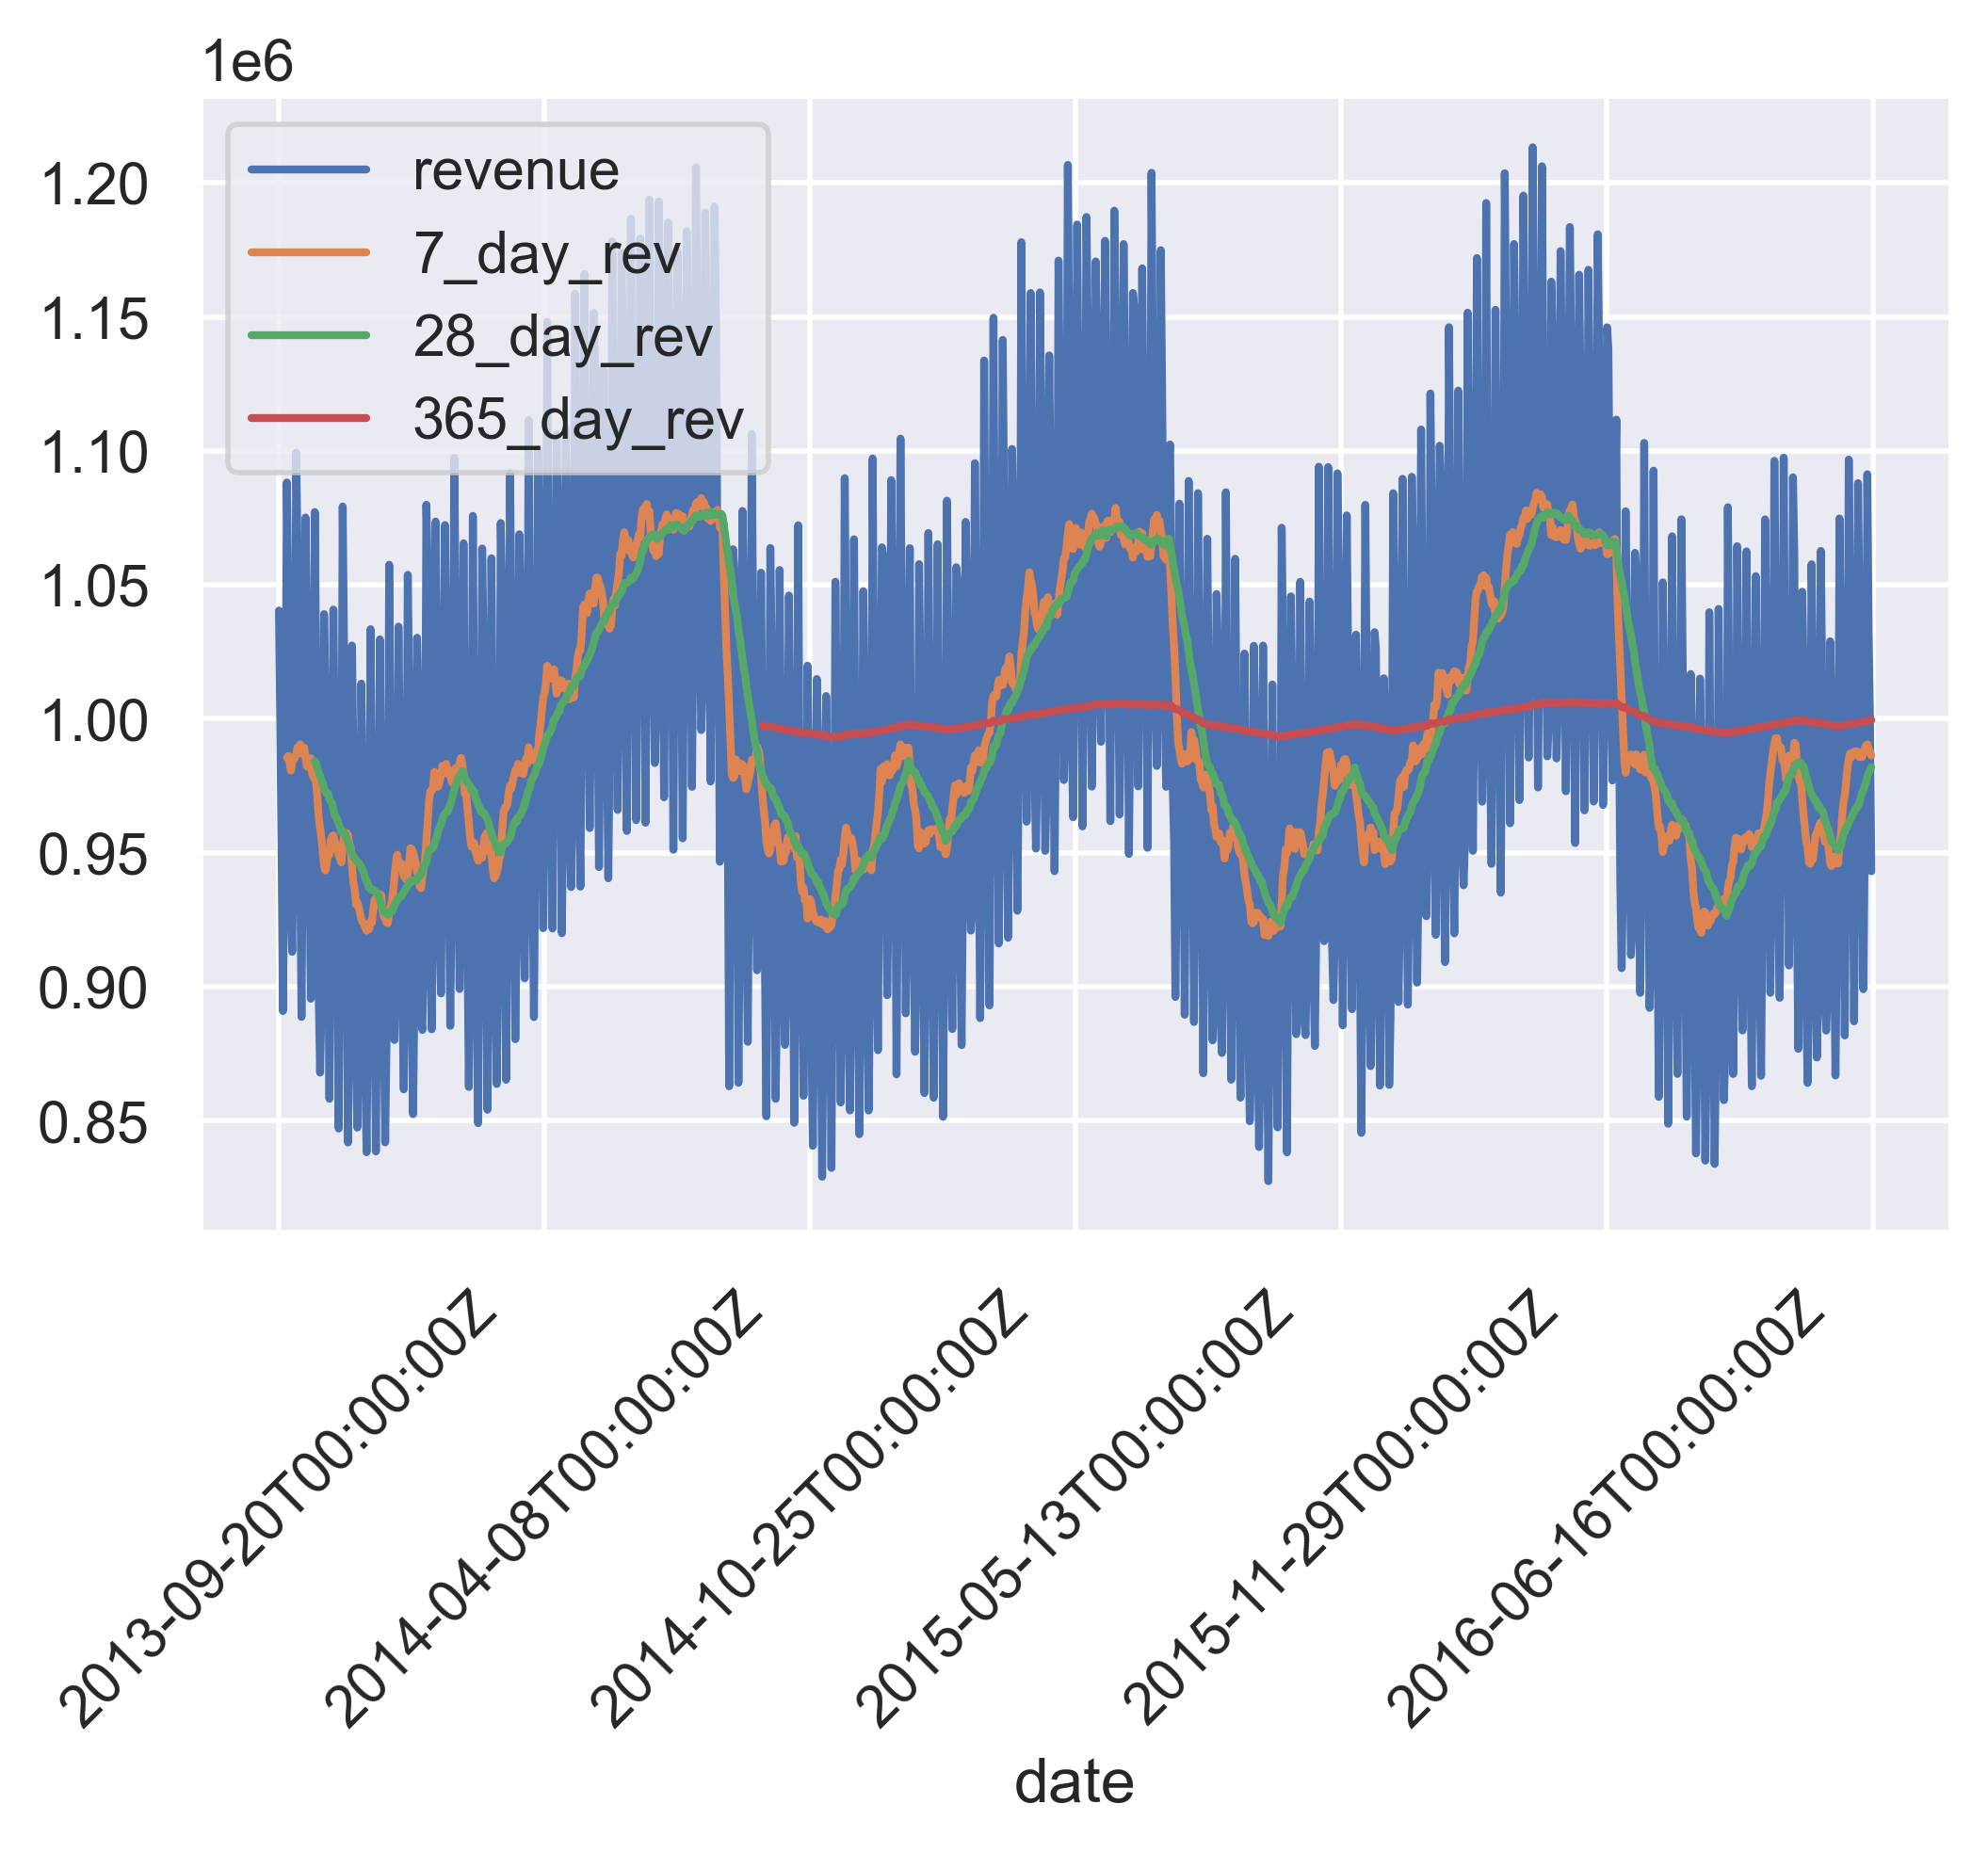

In [177]:
%matplotlib inline
plt.rcParams['figure.dpi']=400

# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_rev.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.xticks(rotation=45)
plt.show()

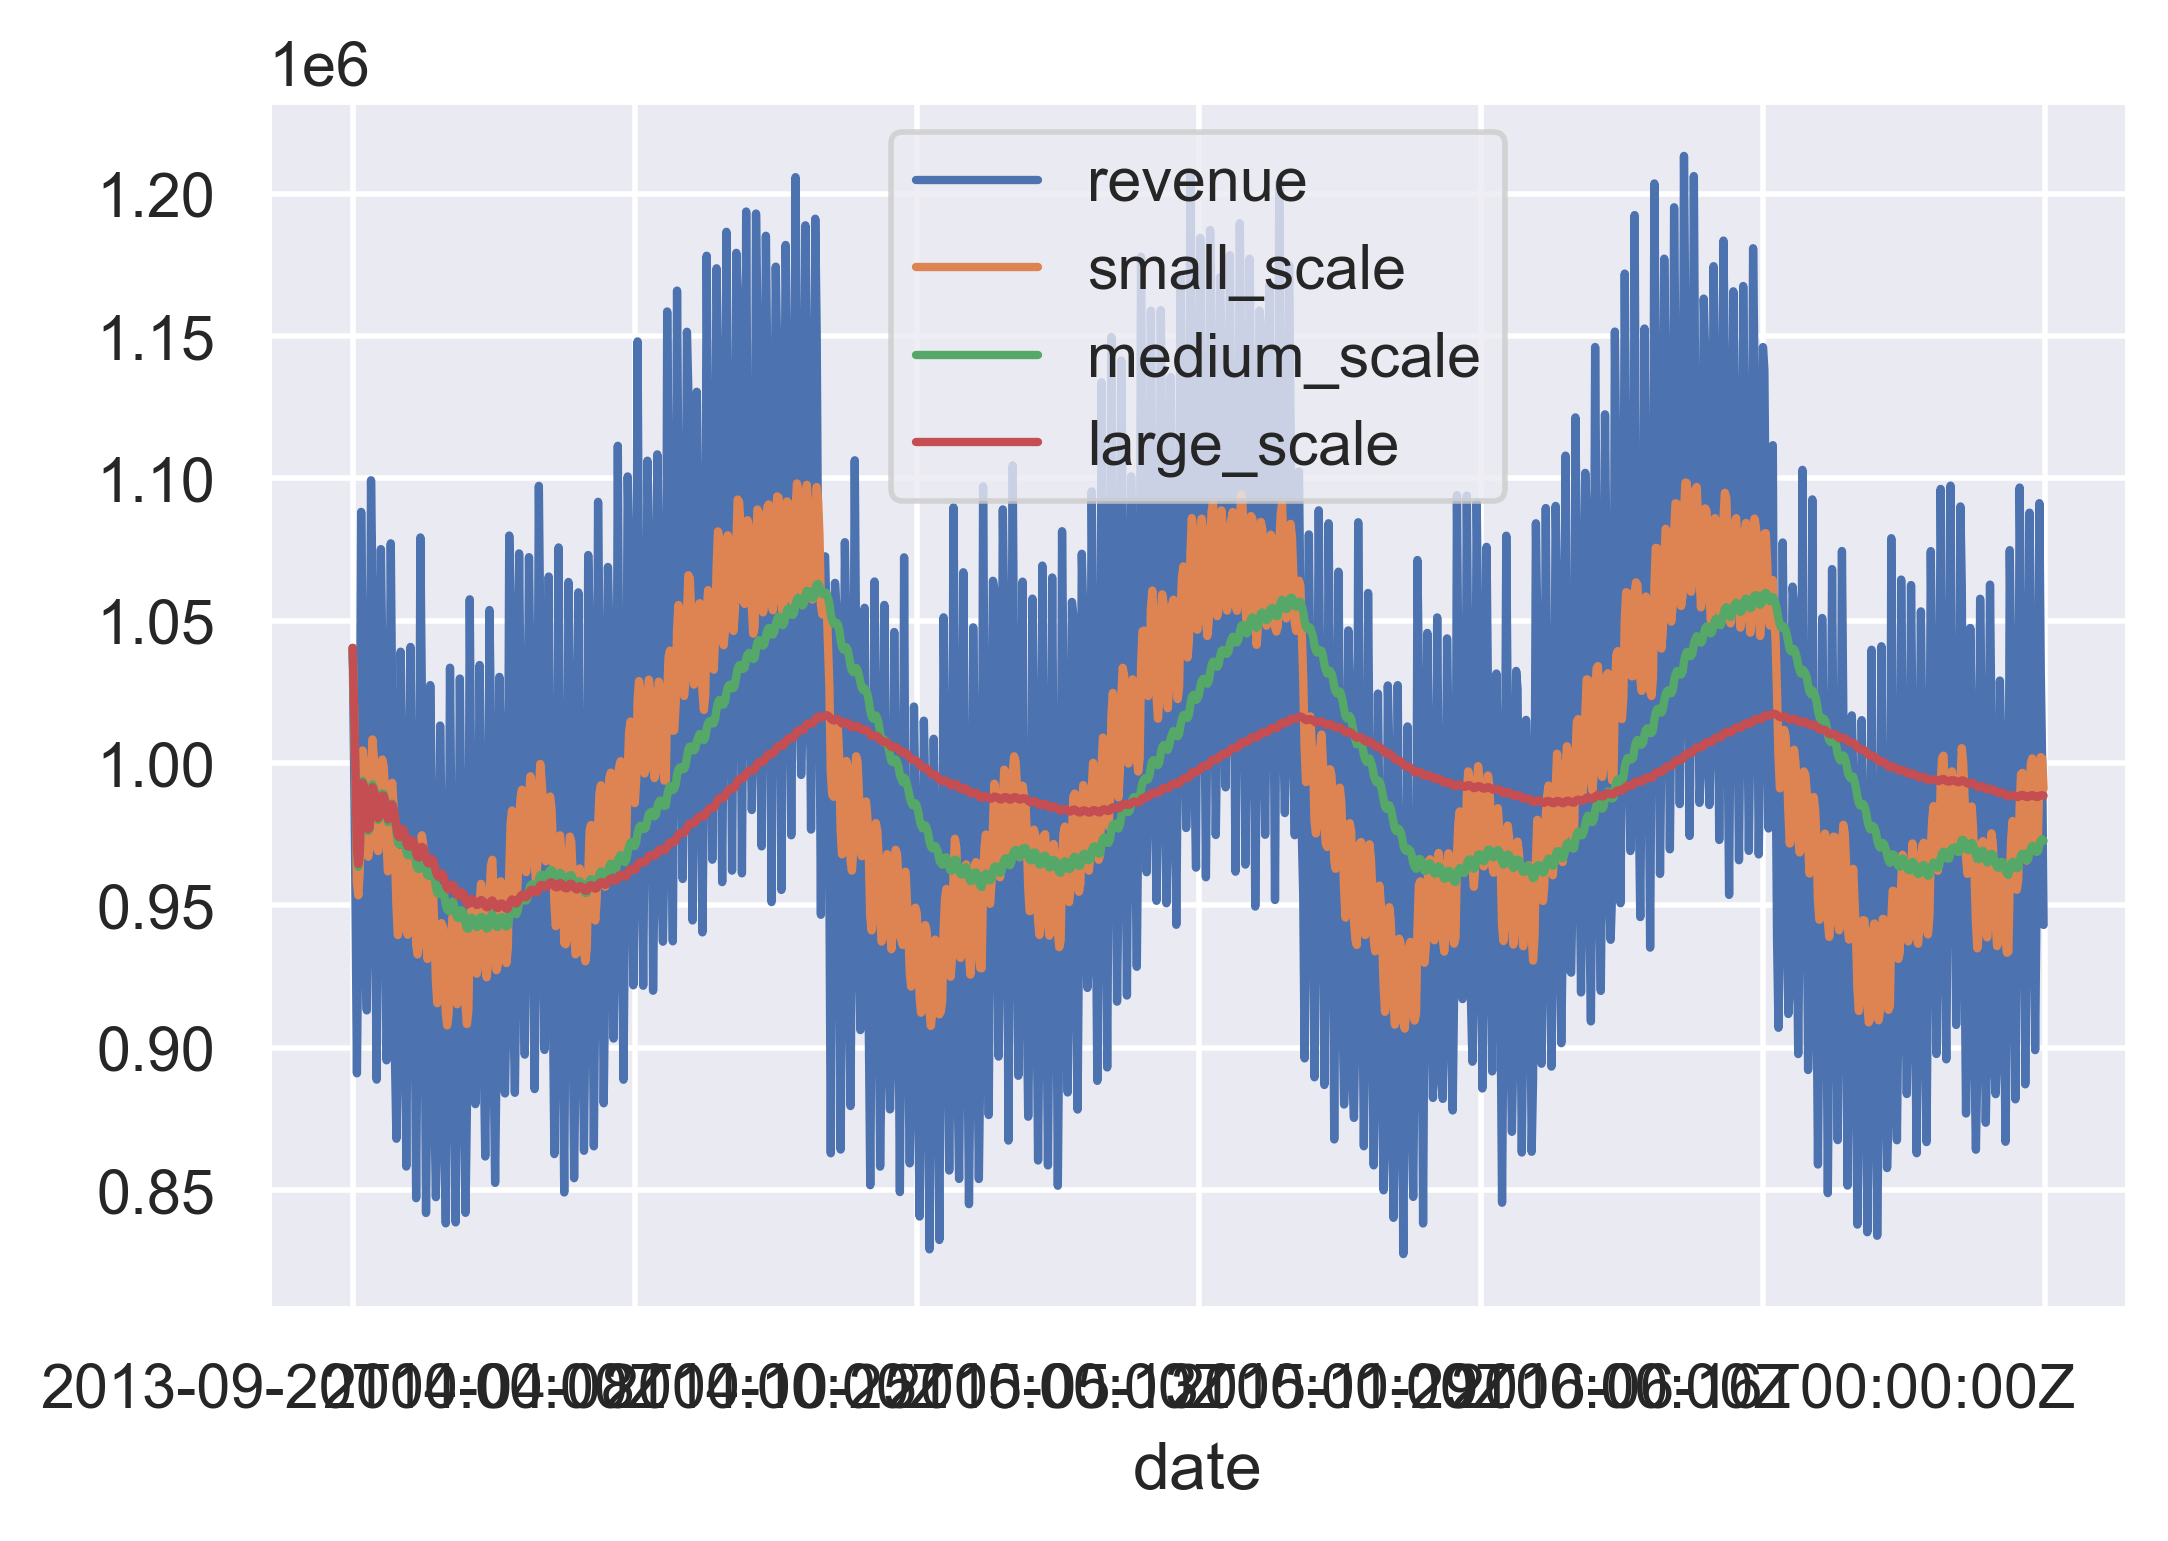

In [178]:
# Calculate 'small_scale'
daily_rev['small_scale'] = daily_rev.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_rev['medium_scale'] = daily_rev.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_rev['large_scale'] = daily_rev.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_rev.plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

In [179]:
# Group the data and aggregate first_week_purchases
user_revenue = daily_revenue.groupby(by=['date', 'gender', 'device']).agg({'revenue': ['sum']})
user_revenue.head()
# Reset the indexes
user_revenue.columns = user_revenue.columns.droplevel(level=1)
user_revenue.reset_index(inplace=True)

In [180]:
user_revenue

date  gender   device   revenue
0     2013-09-20T00:00:00Z  female  android  109326.0
1     2013-09-20T00:00:00Z  female      ios  150141.0
2     2013-09-20T00:00:00Z    male  android  337340.0
3     2013-09-20T00:00:00Z    male      ios  443598.0
4     2013-09-21T00:00:00Z  female  android  108575.0
...                    ...     ...      ...       ...
4795  2016-12-31T00:00:00Z    male      ios  426079.0
4796  2017-01-01T00:00:00Z  female  android   98770.0
4797  2017-01-01T00:00:00Z  female      ios  143517.0
4798  2017-01-01T00:00:00Z    male  android  295857.0
4799  2017-01-01T00:00:00Z    male      ios  404948.0

[4800 rows x 4 columns]

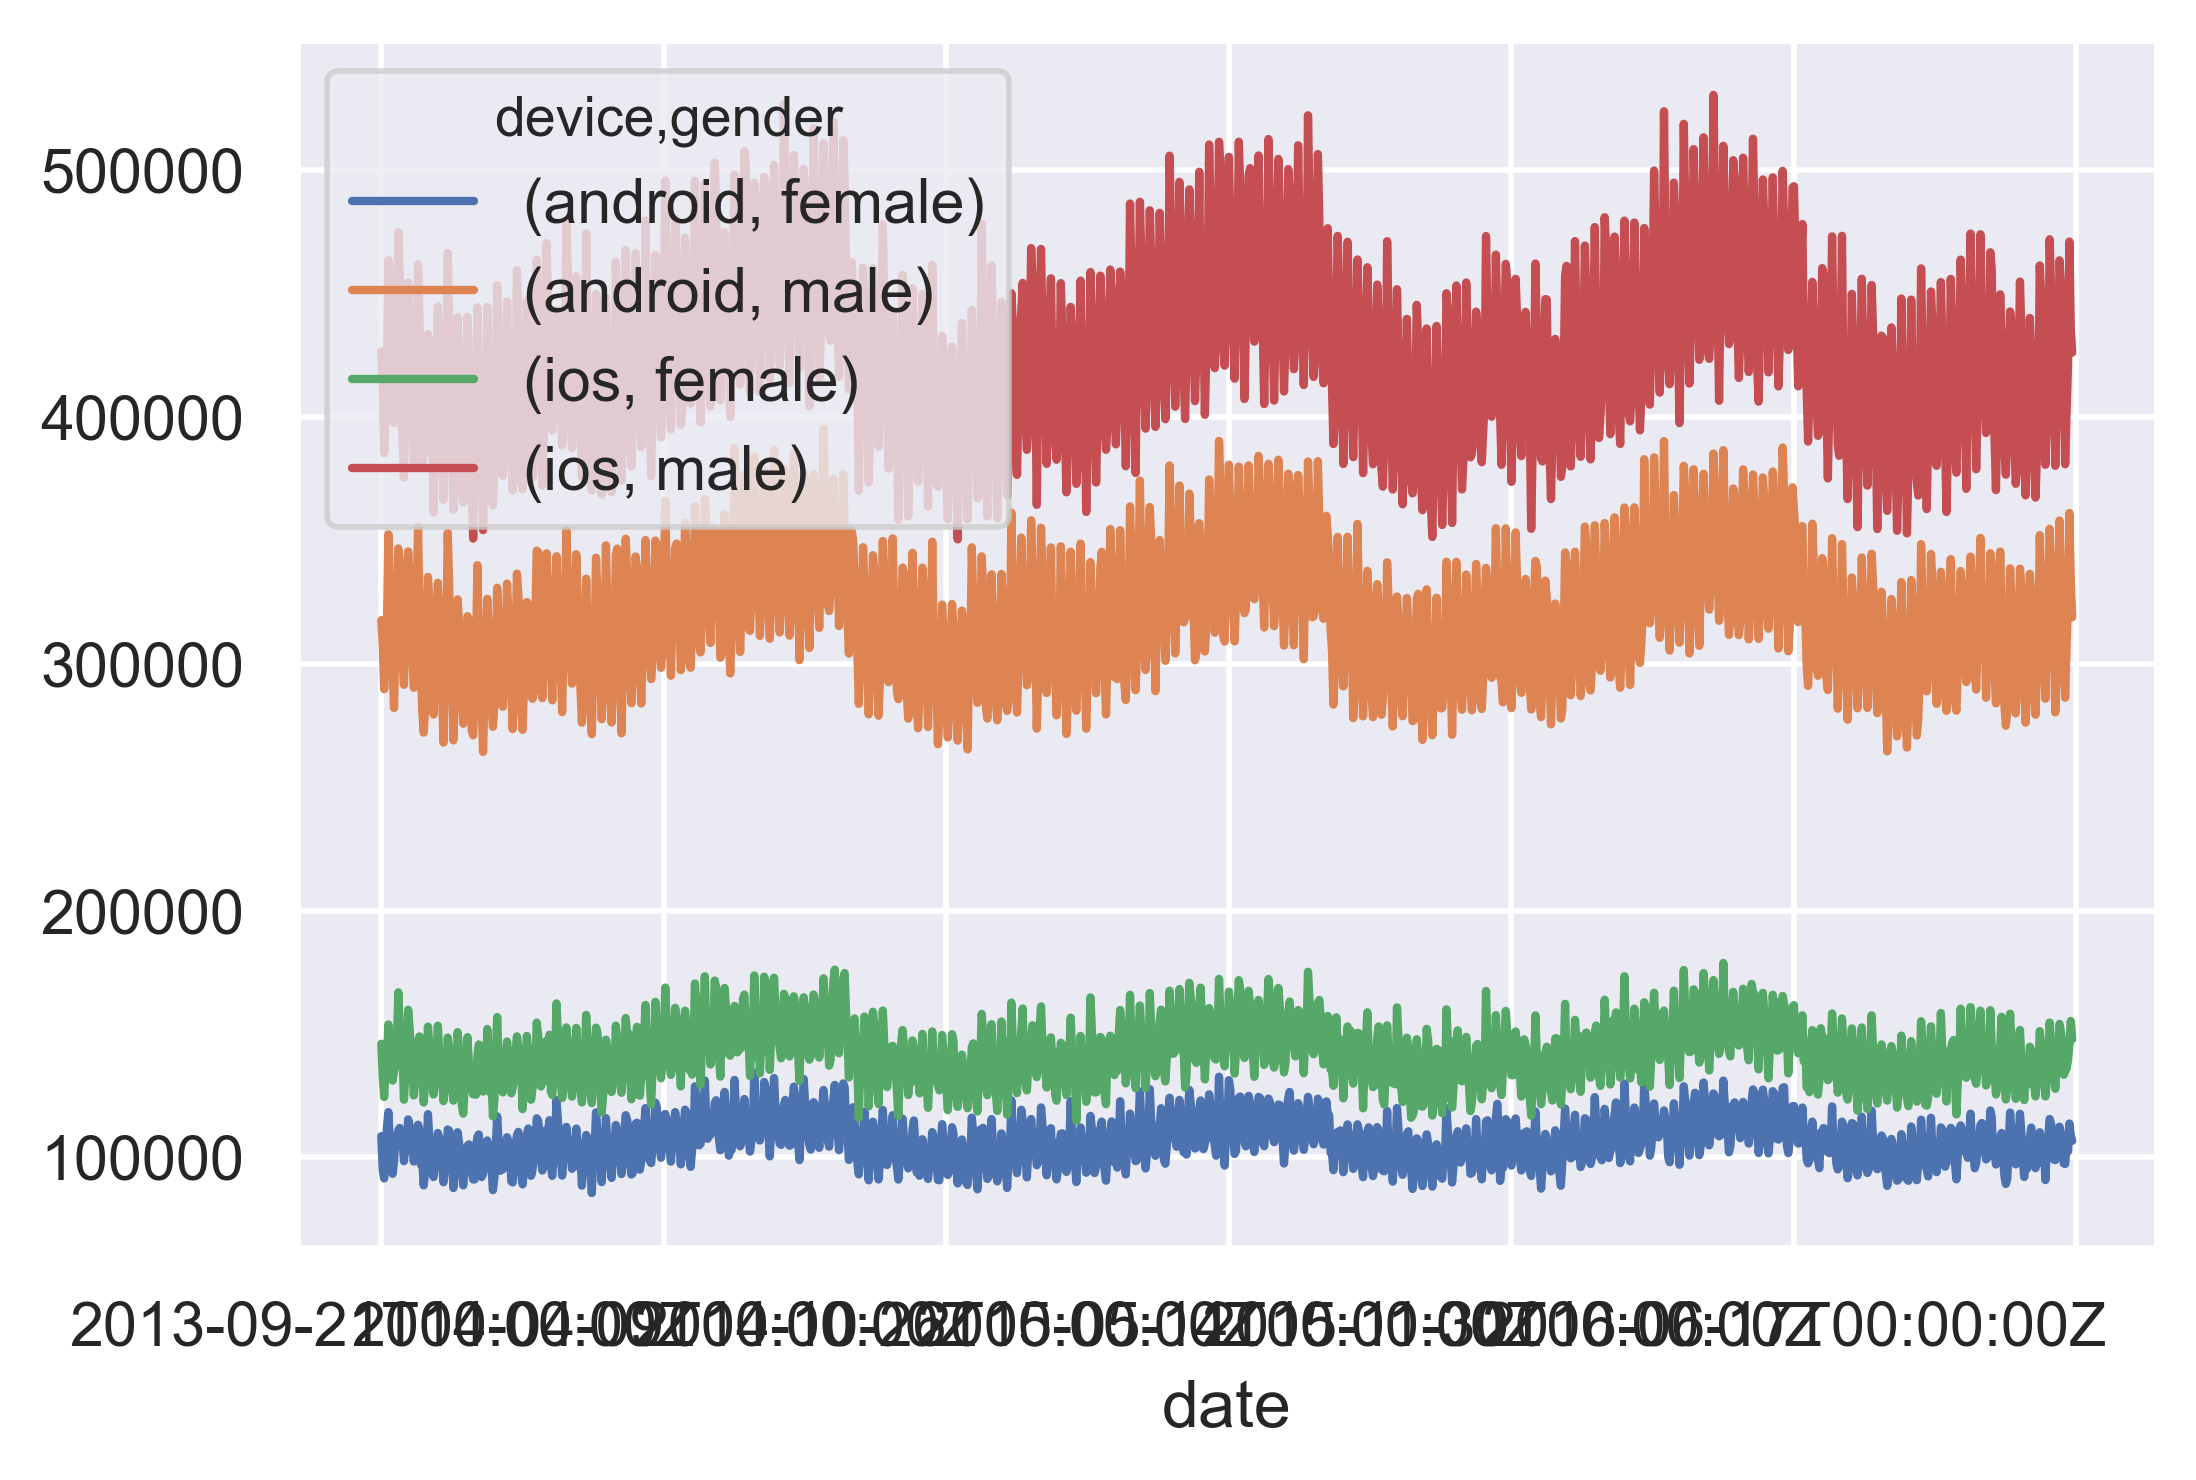

In [115]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='date')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

In [118]:
import datetime as dt
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])

In [121]:
daily_revenue['month'] = daily_revenue['date'].dt.strftime('%Y-%m')

In [122]:
daily_revenue

index  gender   device   revenue                      date country  \
0          1    male      ios  186557.0 2013-09-20 00:00:00+00:00     USA   
1          2    male      ios  177217.0 2013-09-21 00:00:00+00:00     USA   
2          3    male      ios  177197.0 2013-09-22 00:00:00+00:00     USA   
3          4    male      ios  157193.0 2013-09-23 00:00:00+00:00     USA   
4          5    male      ios  165592.0 2013-09-24 00:00:00+00:00     USA   
...      ...     ...      ...       ...                       ...     ...   
47995   1196  female  android   14003.0 2016-12-28 00:00:00+00:00     TUR   
47996   1197  female  android   16473.0 2016-12-29 00:00:00+00:00     TUR   
47997   1198  female  android   14344.0 2016-12-30 00:00:00+00:00     TUR   
47998   1199  female  android   14387.0 2016-12-31 00:00:00+00:00     TUR   
47999   1200  female  android   12553.0 2017-01-01 00:00:00+00:00     TUR   

         month  
0      2013-09  
1      2013-09  
2      2013-09  
3      2013-09  
4      2013-09  
...        ...  
47995  2016-12  
47996  2016-12  
47997  2016-12  
47998  2016-12  
47999  2017-01  

[48000 rows x 7 columns]

In [124]:
# Group the data and aggregate first_week_purchases
user_revenue = daily_revenue.groupby(by=['month', 'gender', 'device']).agg({'revenue': ['sum']})
user_revenue.head()
# Reset the indexes
user_revenue.columns = user_revenue.columns.droplevel(level=1)
user_revenue.reset_index(inplace=True)

In [126]:
user_revenue.head()

month  gender   device    revenue
0  2013-09  female  android  1144057.0
1  2013-09  female      ios  1543801.0
2  2013-09    male  android  3447967.0
3  2013-09    male      ios  4631978.0
4  2013-10  female  android  3233420.0

In [ ]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

In [144]:
import pandas as pd
daily_revenue = pd.read_csv('daily_revenue.csv')
daily_revenue.head()

index gender device   revenue                  date country
0      1   male    ios  186557.0  2013-09-20T00:00:00Z     USA
1      2   male    ios  177217.0  2013-09-21T00:00:00Z     USA
2      3   male    ios  177197.0  2013-09-22T00:00:00Z     USA
3      4   male    ios  157193.0  2013-09-23T00:00:00Z     USA
4      5   male    ios  165592.0  2013-09-24T00:00:00Z     USA

In [ ]:
# Calculate 'medium_scale'
daily_rev['medium_scale'] = daily_rev.revenue.ewm(span=100).mean()

In [135]:
user_revenue['28_day_rev'] = user_revenue.revenue.rolling(window=28,center=False).mean()

In [136]:
user_revenue

month  gender   device     revenue    28_day_rev
0    2013-09  female  android   1144057.0           NaN
1    2013-09  female      ios   1543801.0           NaN
2    2013-09    male  android   3447967.0           NaN
3    2013-09    male      ios   4631978.0           NaN
4    2013-10  female  android   3233420.0           NaN
..       ...     ...      ...         ...           ...
159  2016-12    male      ios  13066897.0  7.445890e+06
160  2017-01  female  android     98770.0  7.329272e+06
161  2017-01  female      ios    143517.0  7.175359e+06
162  2017-01    male  android    295857.0  6.824175e+06
163  2017-01    male      ios    404948.0  6.357016e+06

[164 rows x 5 columns]

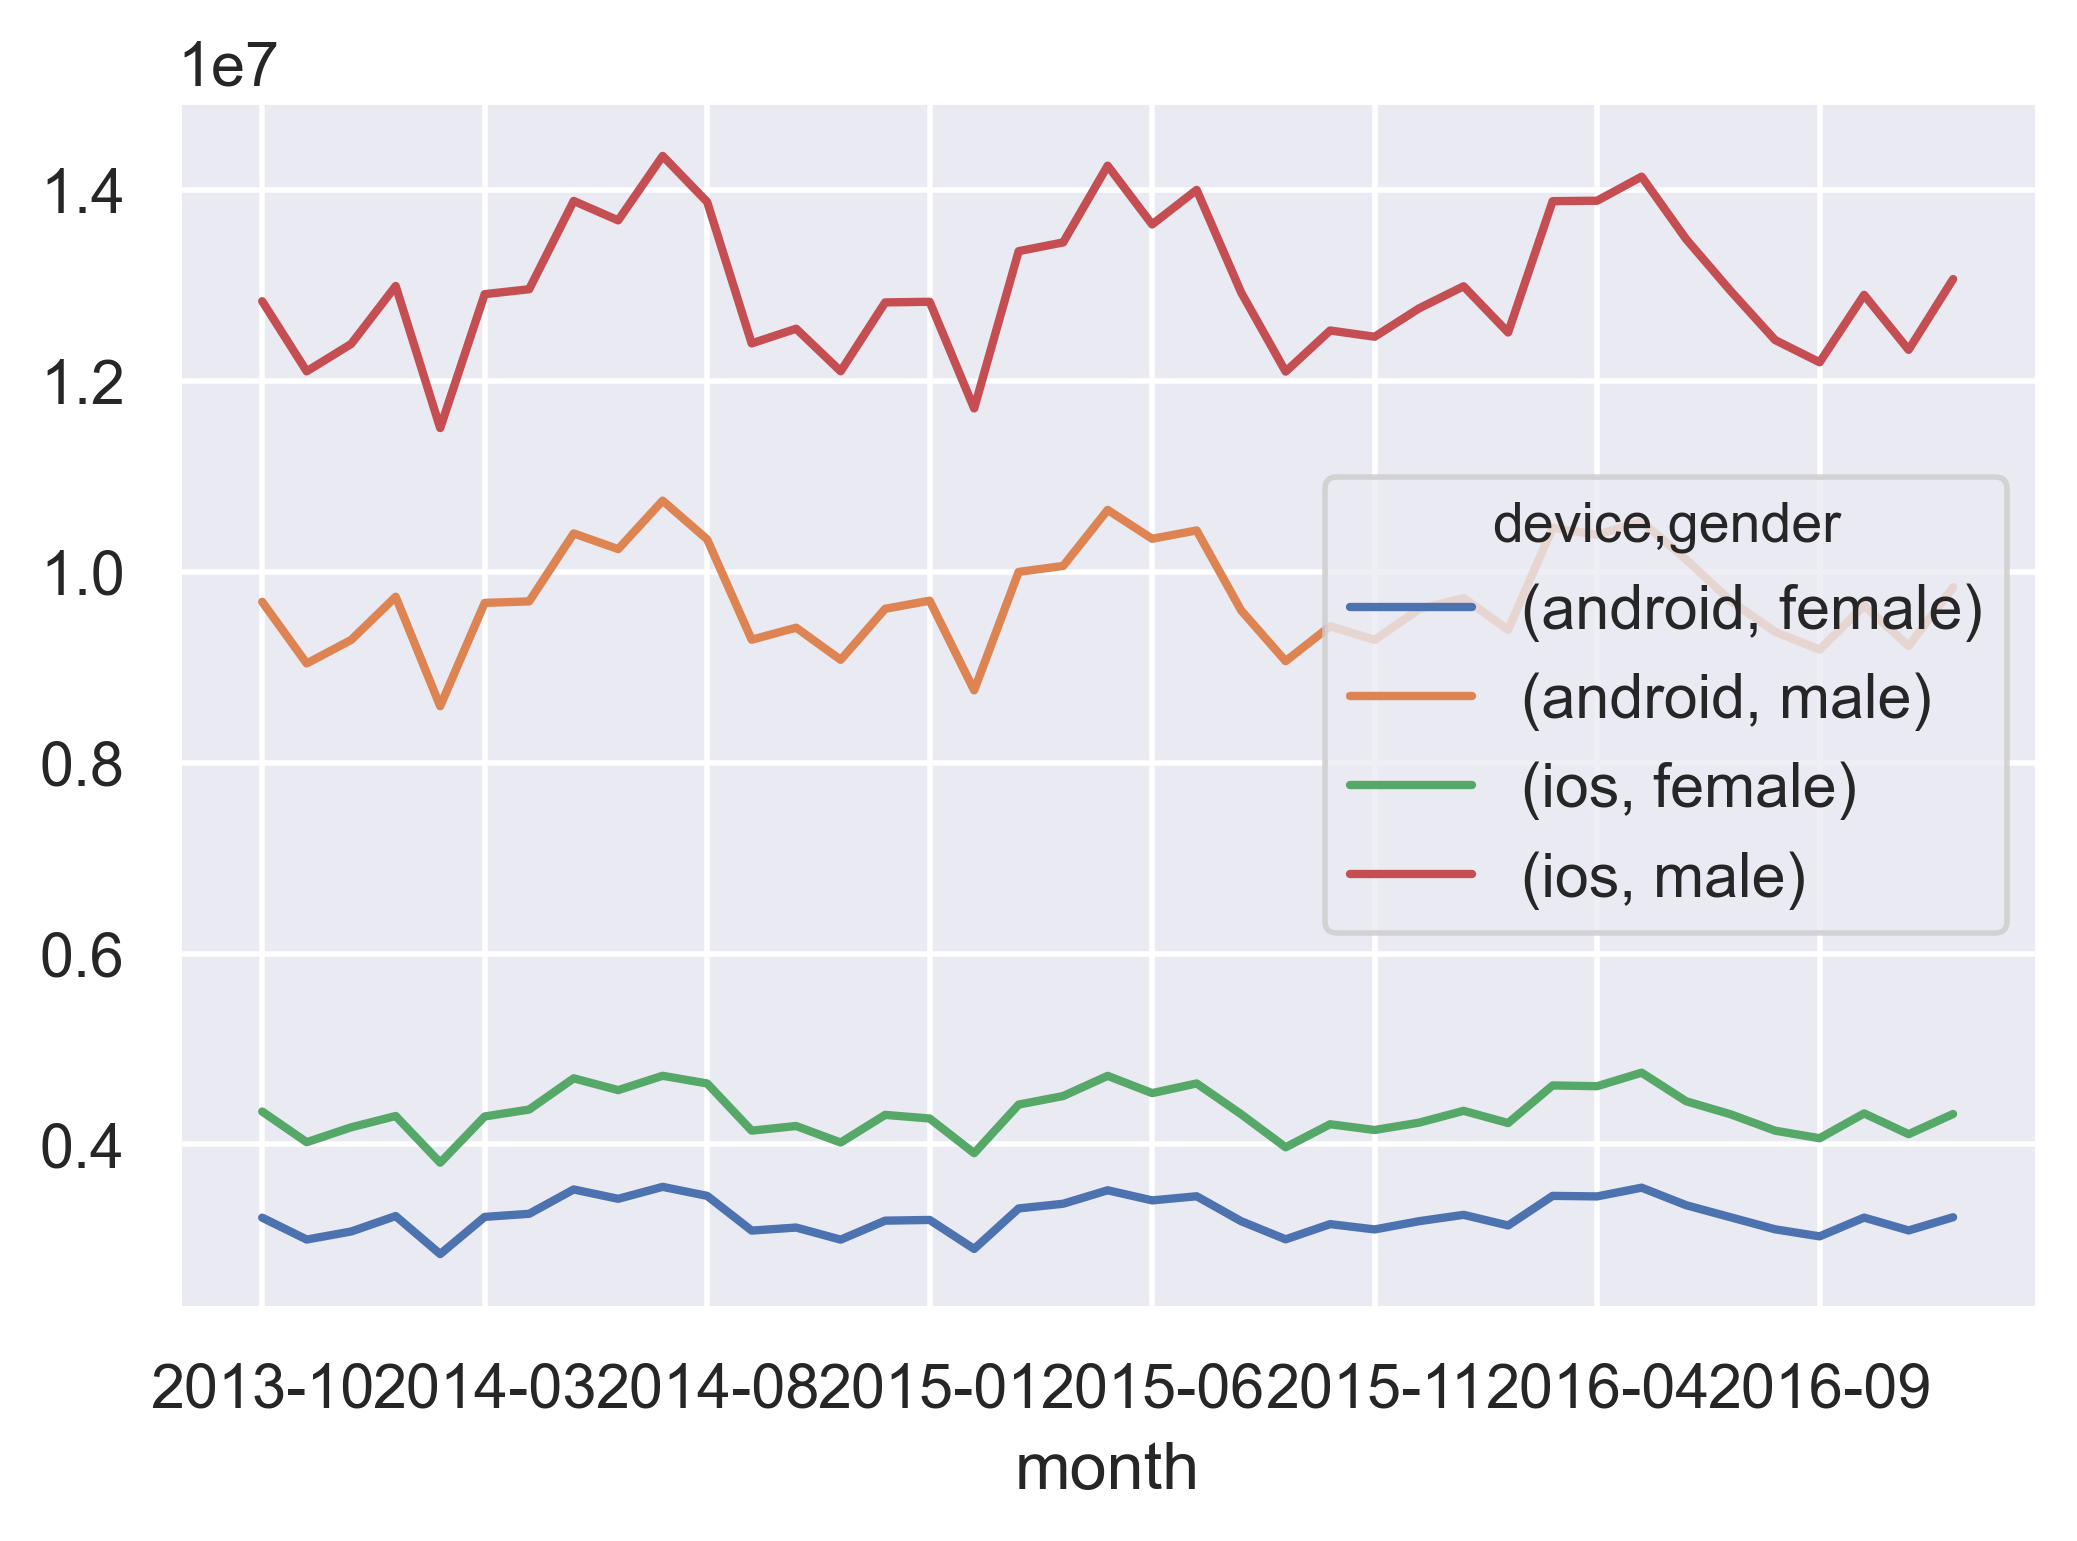

In [143]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

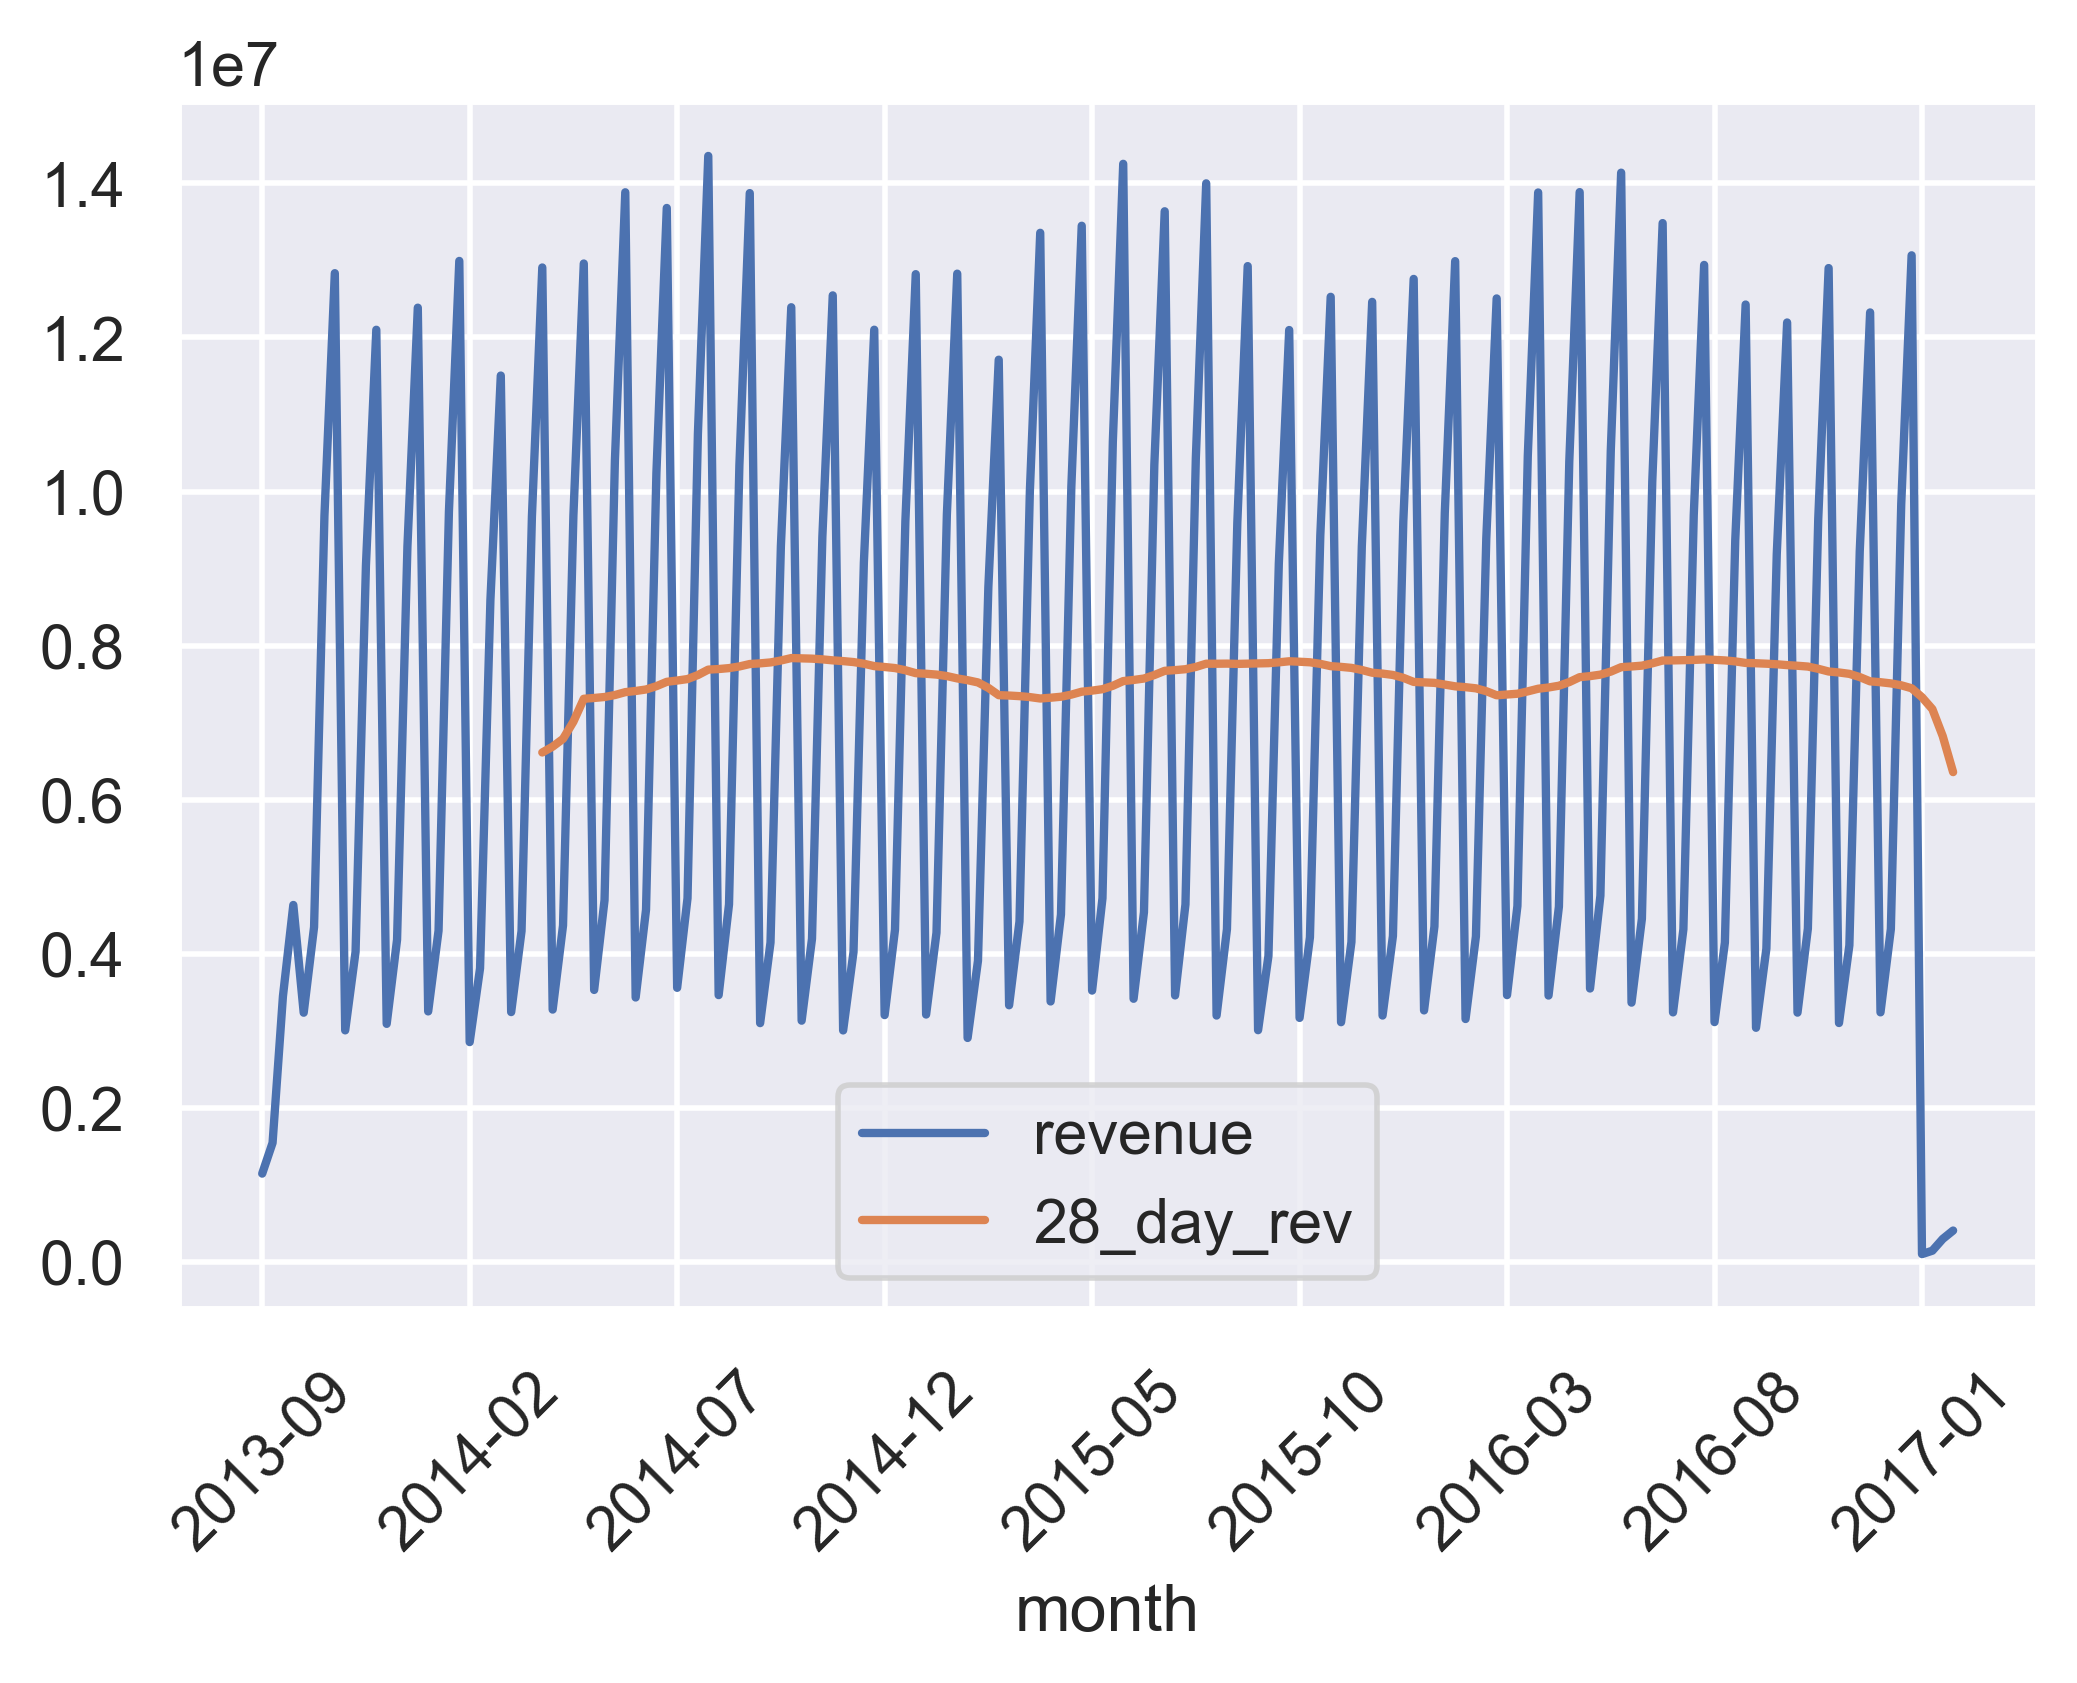

In [141]:
%matplotlib inline
plt.rcParams['figure.dpi']=400

# Plot date, and revenue, along with the 3 rolling functions (in order)    
user_revenue.plot(x='month', y=['revenue','28_day_rev',])
plt.xticks(rotation=45)
plt.show()